# **Objective of the study:**

The objective of this project is to develop a predictive model for detecting spam messages in SMS communication.

Spam detection involves classifying text messages into two categories: spam (unwanted or malicious content) and ham (legitimate messages). By analyzing patterns in the message content, we can build a system that automatically filters out spam messages, improving user experience and protecting against scams.

In this study, various machine learning algorithms such as Naive Bayes, Support Vector Machines, or Random Forests will be used to analyze SMS data and predict whether a message is spam or not based on its content

In [198]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin1')

In [199]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [200]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [201]:
data.ndim

2

In [202]:
data.shape

(5572, 5)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [204]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [205]:
data.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [206]:
data.drop_duplicates(inplace=True)

In [207]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [208]:
data.shape

(5169, 2)

In [209]:
data.isnull().sum()

,0
v1,0
v2,0


In [210]:
data = data.rename(columns={'v1':'target','v2':'text'})

In [211]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [212]:
data['target'].value_counts()

,count
target,
ham,4516
spam,653


In [213]:
data['target'] = data['target'].map({'spam':1,'ham':0})

# **spliting for training and testing**

In [214]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.3, random_state=42)

In [215]:
x_train

,text
1757,"Miss ya, need ya, want ya, love ya."
1048,I walked an hour 2 c u! doesnåÕt that show I c...
4917,Sitting in mu waiting for everyone to get out ...
3113,Yes watching footie but worried we're going to...
2607,:-) yeah! Lol. Luckily i didn't have a starrin...
...,...
4740,Many more happy returns of the day. I wish you...
474,Nice line said by a broken heart- Plz don't cu...
3266,Ok then i come n pick u at engin?
4016,Eek that's a lot of time especially since Amer...


In [216]:
y_train

,target
1757,0
1048,0
4917,0
3113,0
2607,0
...,...
4740,0
474,0
3266,0
4016,0


# **ALGORITHMS**

# **Naive Bayes**

In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

model = MultinomialNB()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)

Confusion Matrix:
 [[1331    0]
 [  80  140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1331
           1       1.00      0.64      0.78       220

    accuracy                           0.95      1551
   macro avg       0.97      0.82      0.87      1551
weighted avg       0.95      0.95      0.94      1551



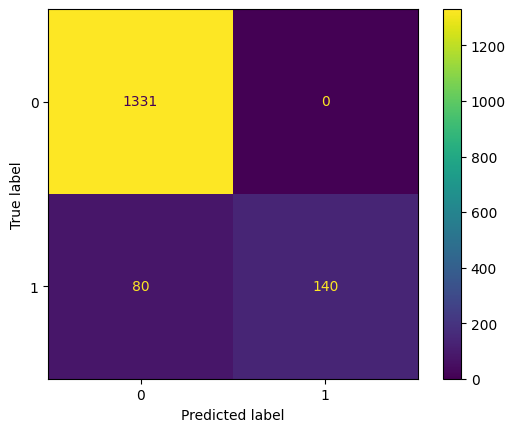

In [218]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_)
cmd.plot()

# **Support Vector Machine**

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

model1 = SVC()
model1.fit(x_train_tfidf, y_train)
y_pred1 = model1.predict(x_test_tfidf)

Confusion Matrix:
 [[1330    1]
 [  29  191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1331
           1       0.99      0.87      0.93       220

    accuracy                           0.98      1551
   macro avg       0.99      0.93      0.96      1551
weighted avg       0.98      0.98      0.98      1551



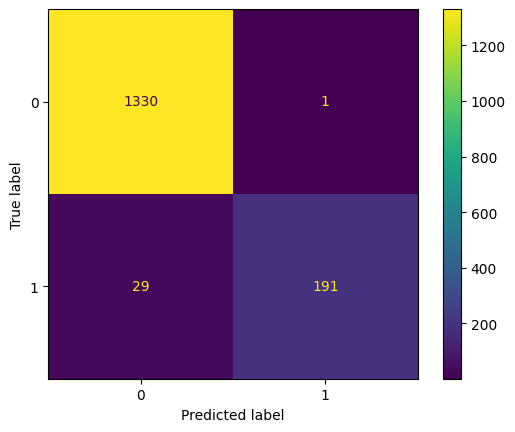

In [220]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred1), display_labels=model.classes_)
cmd.plot()

# **Logistic Regression**

In [221]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

model2 = LogisticRegression()
model2.fit(x_train_tfidf, y_train)
y_pred2 = model2.predict(x_test_tfidf)

Confusion Matrix:
 [[1328    3]
 [  50  170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1331
           1       0.98      0.77      0.87       220

    accuracy                           0.97      1551
   macro avg       0.97      0.89      0.92      1551
weighted avg       0.97      0.97      0.96      1551



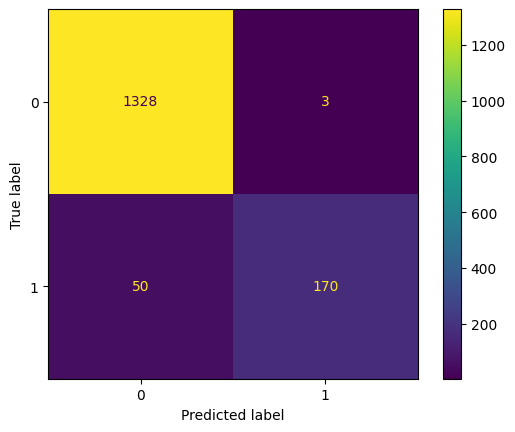

In [222]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2), display_labels=model.classes_)
cmd.plot()

Here Support Vector Machine has the best score in classification report. So we are choosing it as the best model

# **Detection on New Data point**

In [229]:
model1.predict(tfidf.transform(['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18']))

array([1])